# Тестовое задание

**Выполнил**: Коренев Михаил Михайлович

**Контакты:**

    Telegram: @TaywanZ

<a id="0"></a> <br>
## Оглавление
1. [Начало работы. Оптимизация памяти.](#1)     
2. [Задача №1](#2) 
3. [Задача №2](#3) 
4. [Задача №3](#4)      
5. [Задача №4](#5)     
6. [Задача №5](#6)      
7. [Задача №6](#7)       


<a id="1"></a>
### Начало работы. Оптимизация памяти.

Произведем импорт необходимых библиотек, и данных. 

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('liquor.csv')

C:\Users\taywa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-35316400118,03/25/2021,3385,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,52402,POINT (-91.67969 42.031819),57.0,LINN,1091300.0,Neutral Grain Spirits Flavored,346.0,OLE SMOKY DISTILLERY LLC,76414,Ole Smoky Moonshine Pickles,6,750,12.50,18.75,12,225.00,9.0,2.37
1,INV-35294400059,03/24/2021,3390,Okoboji Avenue Liquor,1610 Okoboji Avenue,Milford,51351,POINT (-95.149955 43.331525),30.0,DICKINSON,1012100.0,Canadian Whiskies,260.0,DIAGEO AMERICAS,10808,Crown Royal Regal Apple,12,1000,19.39,29.09,12,340.08,12.0,3.17
2,INV-35284000067,03/24/2021,2512,Hy-Vee Wine and Spirits / Iowa City,1720 Waterfront Dr,Iowa City,52240,POINT (-91.53046300000001 41.642764),52.0,JOHNSON,1081300.0,American Cordials & Liqueur,259.0,Heaven Hill Brands,76478,Pama Pomegranate Liqueur,6,750,10.00,15.00,24,359.76,18.0,4.75
3,INV-35306600020,03/25/2021,2528,Hy-Vee Food Store #3 / Des Moines,3221 SE 14th St,Des Moines,50315,NaN,77.0,POLK,1031100.0,American Vodkas,260.0,DIAGEO AMERICAS,36188,Gordons 80prf Vodka PET,6,1750,9.74,14.61,6,87.66,10.5,2.77
4,INV-35285000005,03/24/2021,3670,Wal-Mart 2827 / Coralville,2801 Commerce Dr,Coralville,52241,POINT (-91.610774 41.695806),52.0,JOHNSON,1062200.0,White Rum,434.0,LUXCO INC,46350,Hawkeye Light Rum,6,1750,7.67,11.51,6,69.06,10.5,2.77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22284674 entries, 0 to 22284673
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            object 
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Lit

В информации о фрейме данных видно, что фрейм потребляем большое колличество оперативной памяти. Произведем оптимизацию типов данных, чтобы уменьшить потребление памяти.

Пропуски в численных данных будем заменять на значение **-1**.

In [6]:
# Пройдемся по столбцам данных. 

for col in df.columns:

# Там, где возможно, уменьшим потребление памяти путем уменьшения зарезервированной памяти.

    if pd.api.types.is_int64_dtype(df[col]):
        df[col] = df[col].fillna(-1)
        df[col] = pd.to_numeric(df[col], downcast="integer")
    elif pd.api.types.is_float_dtype(df[col]):
        df[col] = df[col].fillna(-1)
        dt = df[col].astype('int64')

# А так же преобразуем неверно распознаный тип данных с плавающей точкой в целочисленный тип.

        if sum(dt == df[col]) == df.shape[0]:
            df[col] = pd.to_numeric(df[col], downcast="integer")
        else:
            df[col] = pd.to_numeric(df[col], downcast="float")
    elif pd.api.types.is_object_dtype(df[col]):
        df[col]= df[col].astype('str')
        df[col] = df[col].str.lower()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22284674 entries, 0 to 22284673
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int16  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          int8   
 9   County                 object 
 10  Category               int32  
 11  Category Name          object 
 12  Vendor Number          int16  
 13  Vendor Name            object 
 14  Item Number            object 
 15  Item Description       object 
 16  Pack                   int16  
 17  Bottle Volume (ml)     int32  
 18  State Bottle Cost      float32
 19  State Bottle Retail    float32
 20  Bottles Sold           int16  
 21  Sale (Dollars)         float32
 22  Volume Sold (Lit

Благодаря произведенным операция, удалось уменьшить вес фрейма **с 4 до 2.8 Гб***.

Теперь оптимизируем столбцы со смешанными типами данных.

In [8]:
# Приведем дату в соответствующий формат.

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Используем столбец Invoice/Item Number в качестве индексов.

df = df.set_index('Invoice/Item Number')

# Столбцы, где лежат данные, которые можно представить ввиде категорий, преобразуем в категориальные данные.

df['Item Number'] = df['Item Number'].fillna(-1)
df['Item Number'] = df['Item Number'].astype('category')
df['City'] = df['City'].fillna(-1)
df['City'] = df['City'].astype('category')
df['County'] = df['County'].fillna(-1)
df['County'] = df['County'].astype('category')
df['Vendor Name'] = df['Vendor Name'].fillna(-1)
df['Vendor Name'] = df['Vendor Name'].astype('category')

# В столбцах, которые в будующем нужны будут для работы в строковом формате, заполним пропуски.

df['Category Name'] = df['Category Name'].fillna(-1)
df['Address'] = df['Address'].fillna(-1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22284674 entries, inv-35316400118 to inv-35318200078
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Store Number           int16         
 2   Store Name             object        
 3   Address                object        
 4   City                   category      
 5   Zip Code               object        
 6   Store Location         object        
 7   County Number          int8          
 8   County                 category      
 9   Category               int32         
 10  Category Name          object        
 11  Vendor Number          int16         
 12  Vendor Name            category      
 13  Item Number            category      
 14  Item Description       object        
 15  Pack                   int16         
 16  Bottle Volume (ml)     int32         
 17  State Bottle Cost      float32       
 18  Stat

В ходе оптимизации удалось уменьшить фрейм данных ещё на примерно 500 Мб.

Итого, с начала оптимизации удалось сжать данные **с 4 Гб до 2.2 Гб**, а так же представить данные в удобных для работы с ними форматах.

<a id="2"></a>
### Задача 1

**Сколько всего срок в файле?**
___

Используем встроенную функцию Pandas, узнаем сколько строк в фрейме данных, это и будет ответ на вопрос.

In [10]:
print('Ответ:', df.shape[0])

Ответ: 22284674


<a id="3"></a>
### Задача 2

**Какие временные рамки в наборе данных?**
___
С учетом того, что дата уже преобразована в нужный формат, воспользуемся встроеннными функциями и узнаем самую раннюю и самую позднюю даты.

In [11]:
print('Ответ: с', df['Date'].min().date(), 'до', df['Date'].max().date())

Ответ: с 2012-01-03 до 2021-09-30


<a id="4"></a>
### Задача 3

**Посчитайте кол-во магазинов , которые находятся в квадрате координат  (-93,6;-91,6;41;42).**
___
Необходимо вытащить из столбца *Store Location* пары координат *X* и *Y*, после чего отфильтровать данные по условия задания.

In [12]:
# Внесем данные из условия задачи

x1 = -93.6
y1 = -91
x2 = 41
y2 = 42

In [13]:
# С помощью регулярный выражений найдем координаты и очистим от слижных символов

df['coord'] = df['Store Location'].str.extract(r'(\([\ \-0-9.]*\))', flags=re.M)
df['coord'] = df['coord'].str.strip('()')

# Создадим два новых столбца куда поместить полученные координаты, присвоим нужный тип даннных

df[['X', 'Y']] = df['coord'].str.split(' ', expand=True)
df['X'] = df['X'].astype('float')
df['Y'] = df['Y'].astype('float')

# Удалим ненужный столбец, запищем в переменную номера магазинов в указанном квадрате

df = df.drop(columns='coord')
list_store_in_box = list(df.query('(X >= @x1 & X <= @x2) & (Y >= @y1 & Y <= @y2)')['Store Number'].unique())

In [14]:
print( 'Число магазинов в заданном квадрате:', len(list_store_in_box))

Число магазинов в заданном квадрате: 789


<a id="5"></a>
### Задача 4

**Посчитайте среднюю наценку (в %) используя поля State Bottle Cost, State Bottle Retail, Bottles Sold по категориям Category Name. Укажите ТОП 5 категорий с наиболее высокой наценкой.**
___
Создадим сводную таблицу, в качестве индексов будут категории товаров, в качестве значений выберем запрошенные в задание столбцы, агрегирующая функция - вычисление среднего значения.

In [15]:
# Создаем сводную таблицу

pt = df.pivot_table(index='Category Name', values=['State Bottle Cost', 'State Bottle Retail', 'Bottles Sold'],
                    aggfunc='mean')

# В сводной таблице создадим новый столбец, в котором рассчитаем наценку в процентах

pt['percent'] = (pt['State Bottle Retail'] - pt['State Bottle Cost'])/ pt['State Bottle Cost'] * 100

# Выведем на экран 5 категорий с наибольшей наценкой

pt.sort_values(by='percent', ascending=False).head(5)

,Bottles Sold,State Bottle Cost,State Bottle Retail,percent
Category Name,,,,
barbados rum,5.973156,9.881313,14.939798,51.192440
american cocktails,7.449495,7.131877,10.766056,50.956841
vodka flavored,7.344949,7.269588,10.959168,50.753639
imported amaretto,6.742904,13.221285,19.931515,50.753235
root beer schnapps,7.177378,6.040386,9.097285,50.607689


<a id="6"></a>
### Задание 5

**В файле address_category содержится набор адресов магазинов и категорий продуктов. Используя эти связки значений уменьшите исходную таблицу, а затем посчитайте сумму продаж столбца Sale (Dollars)**
___
Загрузим файл и ознакомимся с ним.

In [16]:
df1 = pd.read_csv('address_category.csv', sep=';')
df1.head()

,Address,Category Name
0,"1, Grove Rd",Blended Whiskies
1,"1, GROVE RD",IRISH WHISKIES
2,"1, Grove Rd",White Rum
3,10 3rd St NW,TENNESSEE WHISKIES
4,"10 3rd St. NW, Ste B",Imported Vodkas


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5622 entries, 0 to 5621
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        5622 non-null   object
 1   Category Name  5622 non-null   object
dtypes: object(2)
memory usage: 88.0+ KB


Создадим новый признак - "склеим" адресс и категорию.

In [18]:
df1['new_f'] = df1['Address'] + df1['Category Name']
df1['new_f'] = df1['new_f'].str.lower()
df1.head()

,Address,Category Name,new_f
0,"1, Grove Rd",Blended Whiskies,"1, grove rdblended whiskies"
1,"1, GROVE RD",IRISH WHISKIES,"1, grove rdirish whiskies"
2,"1, Grove Rd",White Rum,"1, grove rdwhite rum"
3,10 3rd St NW,TENNESSEE WHISKIES,10 3rd st nwtennessee whiskies
4,"10 3rd St. NW, Ste B",Imported Vodkas,"10 3rd st. nw, ste bimported vodkas"


В исходном фрейме сделаем такую же склейку.

In [19]:
df['new_f2'] = df['Address'] + df['Category Name']

Теперь, найдем уникальный склейку из второго фрейма и по ним отфильтруем первый фрейм, после чего сложим значение из столбца *Sale (Dollars)*

In [20]:
features = df1['new_f'].unique()
total_income = df.query('new_f2 in @features')['Sale (Dollars)'].sum()

Выведем на экран ответ на задачу.

In [21]:
print('Суммарные продажи:', total_income)

Суммарные продажи: 175312930.0


<a id="7"></a>
### Задание 6

**По тем магазинам (Store Number), где количество Вендоров 20 и более, проставьте приоритет по следующему правилу:**

	а) Приоритет 1 - магазины где больше всего (в долларах) продается Canadian Whiskies
	б) Приоритет 2 - магазины, где больше всего (в долларах) продается бутылка 750 ml
	в) Приоритет 3 - магазины, которые находятся в квадрате из задания 3
	г) Приоритет 4 - остальные магазины
    
**Сколько всего магазинов каждого приоритета?**
___

In [22]:
# Удалим ненужные фреймы данных

del df1, pt

Создадим сводную таблицу, в которой для каждого номера магазина вычислим число уникальных вендоров. После чего выберем те номера магазинов где 20 и более уникальных вендоров, по этому списку создадим новый признак у исходного фрейма.

In [23]:
# Создаем сводную таблицу и из неё получаем нужный список магазинов

pv = df.pivot_table(index='Store Number', values='Vendor Number', aggfunc='nunique')
list_data = pv.loc[pv['Vendor Number'] >= 20].index
list_data = list_data.to_list()

# Создаем новый признак у исходного фрейма

df['boolen'] = df['Store Number'].isin(list_data)

# Создаем новый фрейм, отфильтрованный по созданному признаку

df6 = df.loc[df['boolen'] == True]

# Удаляем ненужные данные

del pv, list_data, df

Теперь выполним пункт *a* задания. Создадим сводную таблицу, в которой будут только магазины, торгующие нужной категорией и просуммируем их доход. Отфильтруем таблицу по убыванию.

In [24]:
pv = (df6.loc[df6['Category Name'] == 'canadian whiskies']
    .pivot_table(index='Store Number', values='Sale (Dollars)', aggfunc='sum')
    .sort_values(by='Sale (Dollars)', ascending=False))
pv.head(15)

,Sale (Dollars)
Store Number,
2633,7457858.500
4829,6235824.500
3420,3971133.250
2593,3786987.250
3385,3551511.000
3814,3103327.250
3447,2926004.500
3524,2449981.000
3494,2428144.500


Построим график, на котором можно будет определить, как сильно различаются доходы у магазинов.

<AxesSubplot:title={'center':'Доходы магазинов'}, xlabel='Store Number'>

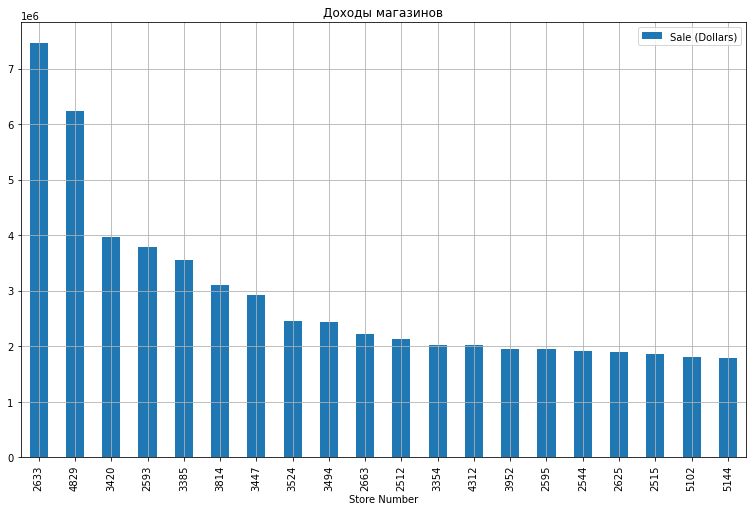

In [25]:
pv.head(20).plot(y= 'Sale (Dollars)', kind='bar', title='Доходы магазинов', grid=True, figsize=(13,8))

Теперь выполним пункт *б* задания. Создадим сводную таблицу, в которой будут только магазины, торгующие нужной тарой и просуммируем их доход. Отфильтруем таблицу по убыванию.

In [26]:
pv2 = (df6.loc[df6['Bottle Volume (ml)'] == 750]
    .pivot_table(index='Store Number', values='Sale (Dollars)', aggfunc='sum')
    .sort_values(by='Sale (Dollars)', ascending=False))
pv2.head(15)

,Sale (Dollars)
Store Number,
2633,24659574.0
4829,22892638.0
2512,16112299.0
2663,15493724.0
2190,11330015.0
2648,10772680.0
2665,10572288.0
2619,10421803.0
2501,9568021.0


Построим график, на котором можно будет определить, как сильно различаются доходы у магазинов.

<AxesSubplot:title={'center':'Доходы магазинов'}, xlabel='Store Number'>

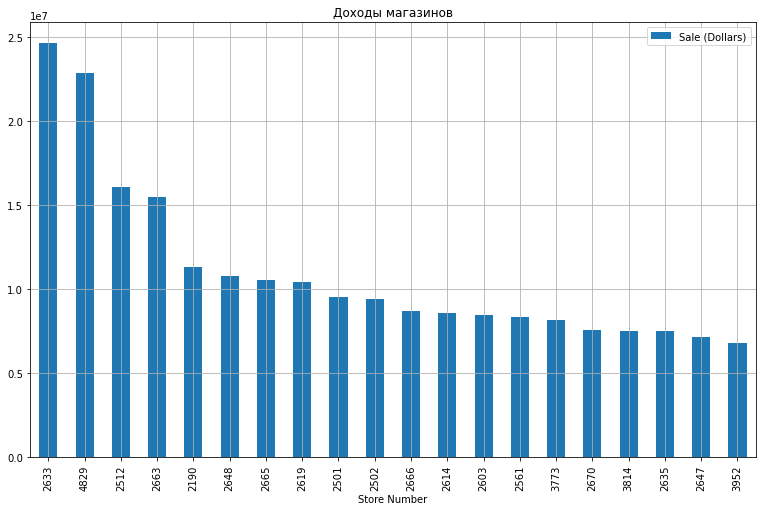

In [27]:
pv2.head(20).plot(y= 'Sale (Dollars)', kind='bar', title='Доходы магазинов', grid=True, figsize=(13,8))

Начнем присваивать приоритеты. Базово, присвоим всем магазинам приоритет **4**.

In [28]:
df6['priority'] = 4

Создадим списки с магазинами, которые соответствуют каждому пункту задачи.

In [32]:
list_data_1 = pv.head(1).index.to_list()
list_data_2 = pv2.head(2).index.to_list()

set_data_1 = set(list_data_1)
set_data_2 = set(list_data_2)

list_data_2 = list(set_data_2 - (set_data_2 & set_data_1))

list_data_3 = list(set(list_store_in_box) & set(df6['Store Number'].to_list()))
list_data_3 = list((set(list_data_3) - (set(list_data_3) & set_data_2)) - set_data_1)

Присвоим, в соответствие со списками, приоритеты в рабочем фрейме данных.

In [33]:
df6.loc[df6['Store Number'].isin(list_data_1), 'priority'] = 1
df6.loc[df6['Store Number'].isin(list_data_2), 'priority'] = 2
df6.loc[df6['Store Number'].isin(list_data_3), 'priority'] = 3

Построим сводную таблицу, в каторой посчитаем количество магазинов с каждым приоритетом.

In [34]:
df6.pivot_table(index='priority', values='Store Number', aggfunc='nunique')

,Store Number
priority,
1,1
2,1
3,734
4,1703
